# Bond-percolation 

본드 퍼콜레이션은 격자나 그래프에서 임의로 일부 본드를 제거하여, 남은 본드들로 연결된 클러스터가 형성되는 확률적 모델링 기법
주어진 확률 p로 각 본드를 제거하거나 유지할지를 결정한다.

## 과정 : 
    1. 본드 설정: 격자의 각 점 (i, j)에 대해 인접한 오른쪽, 왼쪽, 위, 아래 방향에 대해 본드를 설정합니다.
    2. 본드 섞기: 설정된 본드들을 무작위로 섞습니다.
    3. 유니온-파인드를 사용한 클러스터 찾기: 각 본드를 순서대로 살펴보며, 두 점이 같은 클러스터에 속하는지 판별합니다. 이를 위해 유니온-파인드 자료구조를 사용합니다.
    4. 클러스터 크기 기록: 각 본드가 추가될 때마다 현재까지 발견된 가장 큰 클러스터의 크기를 기록하고, 이를 시각화하여 변화를 관찰할 수 있습니다.

## 함수:

- find(i):
   - 이 함수는 재귀적으로 요소 `i`가 속한 집합의 루트 대표를 찾는다. 경로 압축(Path Compression)을 사용하여 나중의 쿼리를 최적화한다. `ptr[i]`가 음수일 경우 (`ptr[i] < 0`), `i` 자체가 루트임을 나타내며, `i`를 반환한다. 그게 아니면 `i`의 루트를 재귀적으로 찾아 업데이트한 후 해당 루트를 반환한다.

- union(r1, r2, big):
   - 이 함수는 두 개의 루트 `r1`과 `r2`를 가진 집합을 합병한다. `ptr` 배열에서 작은 집합을 큰 집합에 병합하여 효율성을 유지한다. `ptr`를 적절히 업데이트하고 가장 큰 집합 크기를 유지하는데, 이 값은 `big_list`에 `big / N`의 정규화된 값으로 추가된다. 함수는 업데이트된 루트 `r1`, `r2` 및 현재 `big` 값을 반환한다.
    
- bond(i,j) :
   - 이 함수는 격자 상의 점들 간의 본드를 설정하는 역할을 한다. 본드 퍼콜레이션 시뮬레이션에서 각 점 (i, j)에 대해 오른쪽, 왼쪽, 위, 아래 방향의 본드를 설정하여 리스트 bonds에 저장한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find(i):
    if ptr[i]<0:
        return i
    else:
        ptr[i] = find(ptr[i])
        return ptr[i]

In [3]:
def union(r1,r2,big):
    if r2 != r1:
        if(ptr[r1]>ptr[r2]):
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1
        if -ptr[r1]>big:
            big = -ptr[r1]
    big_list.append(big / N )
    return r1, r2, big

In [4]:
bonds = []
def bond(i, j) :
    for i in range(L):
        for j in range(L):
            index = i * L + j
            if j < L - 1:
                bonds.append((index, index + 1))
            else :
                bonds.append((index, index - L + 1))
            if i < L - 1:
                bonds.append((index, index + L))
            else :
                bonds.append((index, index - L * (L - 1)))

In [5]:
L = 6
N = L ** 2
Kmax = 4
K = np.ones(N, int)
nn = np.empty([N, Kmax], int)
bond_len = 4 * N / 2
p = 0.5
bonds = []

for i in range(N):
    nn[i][0] = i-1+L*(i%L==0)
    nn[i][1] = i+1-L*(i%L==L-1)
    nn[i][2] = i-L+N*(i//L==0)
    nn[i][3] = i+L-N*(i//L==L-1)
ptr = np.empty(N, int)

for i in range(N):
    ptr[i] = -1

bond(L, L)
np.random.shuffle(bonds)

big = 0
big_list = [] # 처음에는 최대 클러스터 크기 그리기
x_list = []

for i in range(len(bonds)):
    s1, s2 = bonds[i][0], bonds[i][1]
    r1, r2 = find(s1), find(s2)
    r1,r2, big = union(r1,r2,big)
    # print("big_list :", len(big_list))
    x_list.append(i / N)
    # print("x_list : ", x_list)

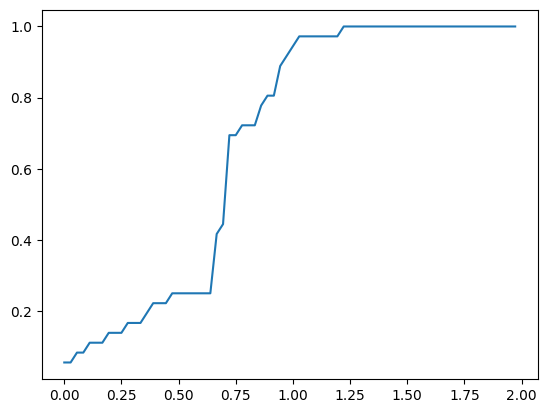

In [6]:
plt.plot(x_list, big_list)